In [21]:
import pandas as pd
import os
import pickle

In [22]:
from google.colab import drive
drive.mount("/content/drive")

os.chdir('/content/drive/MyDrive/SI 630 project')
# os.listdir('.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
os.listdir('datasets/CADEC/CADEC.v2/cadec')


['sct',
 'text',
 'original - unedited version of edited files',
 'meddra - unedited version of edited files',
 'sct - unedited version of edited files',
 'original',
 'meddra']

In [24]:
suf = '_v3'

data_save_dir = 'data'+suf

suf += '_xlm-roberta-large'

In [25]:
meddra_counts = pd.read_csv(data_save_dir+'/meddra_counts.csv')
meddra_counts

,ner,meddra,counts_exploded,counts,counts_exploded_rank
0,Drug,Lipitor,1081,1073,1
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
...,...,...,...,...,...
1294,Finding,Senility,1,1,1233
1295,Drug,Seroquel,1,1,1233
1296,Drug,Solaraze,1,1,1233
1297,Drug,Tagamet,1,1,1233


In [26]:
meddra_counts.loc[meddra_counts.ner == 'ADR',:]

,ner,meddra,counts_exploded,counts,counts_exploded_rank
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
5,ADR,Arthralgia,280,163,6
...,...,...,...,...,...
1268,ADR,Labyrinthitis,1,1,1233
1269,ADR,Dysphagia,1,1,1233
1275,ADR,Lupus_erythematosus,1,1,1233
1278,ADR,Cataract,1,1,1233


In [27]:
with open(data_save_dir+'/cadec_flair_objects.pkl', 'rb') as f:
    docs = pickle.load(f)
docs[:10]

[Sentence[117]: "i feel a bit drowsy & have a little blurred vision , so far no gastric problems . ive been on arthrotec 50 for over 10 years on and off , only taking it when i needed it . due to my arthritis getting progressively worse , to the point where i am in tears with the agony , gp ' s started me on 75 twice a day and i have to take it . every day for the next month to see how i get on , here goes . so far its been very good , pains almost gone , but i feel a bit weird , didnt have that when on 50 ." → ["i"/O/O, "feel"/O/O, "a"/O/O, "bit"/B-ADR/B-Drowsy, "drowsy"/I-ADR/I-Drowsy, "&"/O/O, "have"/O/O, "a"/O/O, "little"/B-ADR/B-Blurred_vision_-_hazy, "blurred"/I-ADR/I-Blurred_vision_-_hazy, "vision"/I-ADR/I-Blurred_vision_-_hazy, ","/O/O, "so"/O/O, "far"/O/O, "no"/O/O, "gastric"/B-ADR/B-Excessive_upper_gastrointestinal_gas, "problems"/I-ADR/I-Excessive_upper_gastrointestinal_gas, "."/O/O, "ive"/O/O, "been"/O/O, "on"/O/O, "arthrotec"/B-Drug/B-Arthrotec, "50"/O/O, "for"/O/O, "over"

In [28]:
len(docs)

1186

In [29]:
temp = docs[0]
temp

Sentence[117]: "i feel a bit drowsy & have a little blurred vision , so far no gastric problems . ive been on arthrotec 50 for over 10 years on and off , only taking it when i needed it . due to my arthritis getting progressively worse , to the point where i am in tears with the agony , gp ' s started me on 75 twice a day and i have to take it . every day for the next month to see how i get on , here goes . so far its been very good , pains almost gone , but i feel a bit weird , didnt have that when on 50 ." → ["i"/O/O, "feel"/O/O, "a"/O/O, "bit"/B-ADR/B-Drowsy, "drowsy"/I-ADR/I-Drowsy, "&"/O/O, "have"/O/O, "a"/O/O, "little"/B-ADR/B-Blurred_vision_-_hazy, "blurred"/I-ADR/I-Blurred_vision_-_hazy, "vision"/I-ADR/I-Blurred_vision_-_hazy, ","/O/O, "so"/O/O, "far"/O/O, "no"/O/O, "gastric"/B-ADR/B-Excessive_upper_gastrointestinal_gas, "problems"/I-ADR/I-Excessive_upper_gastrointestinal_gas, "."/O/O, "ive"/O/O, "been"/O/O, "on"/O/O, "arthrotec"/B-Drug/B-Arthrotec, "50"/O/O, "for"/O/O, "over"/

In [30]:
temp.annotation_layers

{'ner': ['Token[0]: "i"'/'O' (1.0),
  'Token[1]: "feel"'/'O' (1.0),
  'Token[2]: "a"'/'O' (1.0),
  'Token[3]: "bit"'/'B-ADR' (1.0),
  'Token[4]: "drowsy"'/'I-ADR' (1.0),
  'Token[5]: "&"'/'O' (1.0),
  'Token[6]: "have"'/'O' (1.0),
  'Token[7]: "a"'/'O' (1.0),
  'Token[8]: "little"'/'B-ADR' (1.0),
  'Token[9]: "blurred"'/'I-ADR' (1.0),
  'Token[10]: "vision"'/'I-ADR' (1.0),
  'Token[11]: ","'/'O' (1.0),
  'Token[12]: "so"'/'O' (1.0),
  'Token[13]: "far"'/'O' (1.0),
  'Token[14]: "no"'/'O' (1.0),
  'Token[15]: "gastric"'/'B-ADR' (1.0),
  'Token[16]: "problems"'/'I-ADR' (1.0),
  'Token[17]: "."'/'O' (1.0),
  'Token[18]: "ive"'/'O' (1.0),
  'Token[19]: "been"'/'O' (1.0),
  'Token[20]: "on"'/'O' (1.0),
  'Token[21]: "arthrotec"'/'B-Drug' (1.0),
  'Token[22]: "50"'/'O' (1.0),
  'Token[23]: "for"'/'O' (1.0),
  'Token[24]: "over"'/'O' (1.0),
  'Token[25]: "10"'/'O' (1.0),
  'Token[26]: "years"'/'O' (1.0),
  'Token[27]: "on"'/'O' (1.0),
  'Token[28]: "and"'/'O' (1.0),
  'Token[29]: "off"'/'O' (

In [31]:

# define your NER tags
label_dict = {
    'ADR': 'ADR',
    'Drug': 'Drug',
    'Finding': 'Finding',
    'Symptom': 'Symptom',
    'Disease': 'Disease'
}

In [32]:
from flair.data import Corpus

from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings, TransformerWordEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from sklearn.model_selection import train_test_split

from torch.optim import AdamW, SGD

from flair.visual.training_curves import Plotter
plotter = Plotter()



train_docs, test_docs = train_test_split(docs, test_size=0.2, random_state=321)
dev_docs, test_docs = train_test_split(test_docs, test_size=0.5, random_state=123)

corpus = Corpus(train=train_docs, dev=dev_docs, test=test_docs) # Corpus: 948 train + 119 dev + 119 test sentences
corpus.filter_empty_sentences()
# # create a tag dictionary
labels = ['ADR', 'Drug', 'Finding', 'Symptom', 'Disease']
# tag_dictionary = Dictionary(add_unk=True)
# for label in labels:
#     tag_dictionary.add_item(label)
tag_dictionary = corpus.make_label_dictionary(label_type='ner')
print(tag_dictionary.span_labels)

# create a stacked embedding using GloVe and Flair embeddings
# stacked_embeddings = StackedEmbeddings([
#     WordEmbeddings('glove',
#                    force_cpu=False,
#                 #    embedding_length=1024,
#                   #  fine_tune=True,
#                    ),
#     # TransformerWordEmbeddings('emilyalsentzer/Bio_ClinicalBERT', layers="-1",
#     #                                    subtoken_pooling="first",
#     #                                    is_document_embedding=True,
#     #                                    fine_tune=True,
#     #                                    use_context=True,
#     #                                    max_seq_length=1024,
#     #                                    ),
#     FlairEmbeddings('news-forward',
#                     # fine_tune=True
#                     ),
#     FlairEmbeddings('news-backward',
#                     # fine_tune=True
#                     ),
# ])
# https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/FLAIR_EMBEDDINGS.md


embeddings = TransformerWordEmbeddings(model='xlm-roberta-large',
                                       layers="-1",
                                       subtoken_pooling="first",
                                       fine_tune=True,
                                       use_context=True,
                                       )

# create a SequenceTagger object and specify the tag dictionary and embeddings to use
tagger = SequenceTagger(hidden_size=256,
                        # embeddings=stacked_embeddings,
                        embeddings=embeddings,
                        tag_dictionary=tag_dictionary,
                        tag_type='ner',
                        use_crf=False,
                        use_rnn=False,
                        reproject_embeddings=False,
                        )
tagger.predict_spans = False

print(tagger._determine_if_span_prediction_problem(tagger.label_dictionary))
print(tagger.predict_spans)

# https://github.com/flairNLP/flair/blob/master/flair/trainers/trainer.py
# create a ModelTrainer object and train the tagger
trainer = ModelTrainer(tagger, corpus)

2023-04-21 07:35:59,379 Filtering empty sentences
2023-04-21 07:35:59,398 Corpus: 948 train + 119 dev + 119 test sentences
2023-04-21 07:35:59,399 Computing label dictionary. Progress:


948it [00:00, 7337.79it/s]

2023-04-21 07:35:59,533 Dictionary created for label 'ner' with 12 values: O (seen 79057 times), I-ADR (seen 7953 times), B-ADR (seen 4712 times), B-Drug (seen 1396 times), I-Finding (seen 349 times), B-Finding (seen 309 times), B-Disease (seen 231 times), B-Symptom (seen 222 times), I-Symptom (seen 218 times), I-Disease (seen 169 times), I-Drug (seen 161 times)
False


2023-04-21 07:36:09,703 SequenceTagger predicts: Dictionary with 12 tags: <unk>, O, I-ADR, B-ADR, B-Drug, I-Finding, B-Finding, B-Disease, B-Symptom, I-Symptom, I-Disease, I-Drug
True
False


In [33]:
# !tensorboard --logdir=runs
# http://localhost:6006/

In [34]:
hist = trainer.train('flair_ner_model'+suf,
              embeddings_storage_mode='gpu',
              gold_label_dictionary_for_eval=tag_dictionary,
              mini_batch_size = 10,
              eval_batch_size = 10,
              patience=1,
              anneal_factor = 0.5,
              anneal_against_dev_loss=True,
              main_evaluation_metric = ("weighted avg", "f1-score"),
              metrics_for_tensorboard=[("weighted avg", 'precision'), ("weighted avg", 'recall'), ("macro avg", 'f1-score'), ("macro avg", 'precision'), ("macro avg", 'recall')],
              use_tensorboard=True,
              tensorboard_comment='Flair NER',
              tensorboard_log_dir='runs/tb_logs'+suf,
              min_learning_rate=3e-8,
              optimizer=AdamW,
              learning_rate=5.0e-6,
              weight_decay=0.001,
              max_epochs=100,
              monitor_train=True,
              save_optimizer_state=True,)
# hist

2023-04-21 07:36:09,731 tensorboard logging path is runs/tb_logs_v3_xlm-roberta-large
2023-04-21 07:36:09,742 ----------------------------------------------------------------------------------------------------
2023-04-21 07:36:09,746 Model: "SequenceTagger(
  (embeddings): TransformerWordEmbeddings(
    (model): XLMRobertaModel(
      (embeddings): XLMRobertaEmbeddings(
        (word_embeddings): Embedding(250003, 1024)
        (position_embeddings): Embedding(514, 1024, padding_idx=1)
        (token_type_embeddings): Embedding(1, 1024)
        (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): XLMRobertaEncoder(
        (layer): ModuleList(
          (0-23): 24 x XLMRobertaLayer(
            (attention): XLMRobertaAttention(
              (self): XLMRobertaSelfAttention(
                (query): Linear(in_features=1024, out_features=1024, bias=True)
                (key): Linear(in_features=102

100%|██████████| 95/95 [00:21<00:00,  4.35it/s]

2023-04-21 07:37:31,056 Evaluating as a multi-label problem: True


2023-04-21 07:37:33,991 TRAIN : loss 0.3060855567455292 - f1-score (weighted avg)  0.5341


100%|██████████| 12/12 [00:03<00:00,  3.94it/s]

2023-04-21 07:37:37,183 Evaluating as a multi-label problem: False
2023-04-21 07:37:37,250 DEV : loss 0.324864000082016 - f1-score (weighted avg)  0.5074
2023-04-21 07:37:37,270 BAD EPOCHS (no improvement): 0
2023-04-21 07:37:37,275 saving best model


2023-04-21 07:37:55,405 ----------------------------------------------------------------------------------------------------
2023-04-21 07:38:00,256 epoch 2 - iter 9/95 - loss 0.37533373 - time (sec): 4.85 - samples/sec: 1718.68 - lr: 0.000005
2023-04-21 07:38:05,288 epoch 2 - iter 18/95 - loss 0.36437762 - time (sec): 9.88 - samples/sec: 1694.34 - lr: 0.000005
2023-04-21 07:38:10,895 epoch 2 - iter 27/95 - loss 0.35752187 - time (sec): 15.49 - samples/sec: 1685.39 - lr: 0.000005
2023-04-21 07:38:16,920 epoch 2 - iter 36/95 - loss 0.34641611 - time (sec): 21.51 - samples/sec: 1677.11 - lr: 0.000005
2023-04-21 07:38:23,020 epoch 2 - iter 45/95 - loss 0.34523299 - time (sec): 27.61 - samples/sec: 1621.17 - lr: 0.000005
2023-04-21 07:38:29,402 epoch 2 - iter 54/95 - loss 0.33959601 - time (sec): 34.00 - samples/sec: 1611.10 - lr: 0.000005
2023-04-21 07:38:34,844 epoch 2 - iter 63/95 - loss 0.33199797 - time (sec): 39.44 - samples/sec: 1610.36 - lr: 0.000005
2023-04-21 07:38:40,413 epoch 2

100%|██████████| 95/95 [00:22<00:00,  4.31it/s]

2023-04-21 07:39:16,523 Evaluating as a multi-label problem: True


2023-04-21 07:39:18,340 TRAIN : loss 0.21249648928642273 - f1-score (weighted avg)  0.7117


100%|██████████| 12/12 [00:03<00:00,  3.89it/s]


2023-04-21 07:39:22,810 Evaluating as a multi-label problem: False
2023-04-21 07:39:22,878 DEV : loss 0.241384819149971 - f1-score (weighted avg)  0.6682
2023-04-21 07:39:22,899 BAD EPOCHS (no improvement): 0
2023-04-21 07:39:22,904 saving best model
2023-04-21 07:39:44,346 ----------------------------------------------------------------------------------------------------
2023-04-21 07:39:49,817 epoch 3 - iter 9/95 - loss 0.25569278 - time (sec): 5.47 - samples/sec: 1633.01 - lr: 0.000005
2023-04-21 07:39:55,089 epoch 3 - iter 18/95 - loss 0.27213214 - time (sec): 10.74 - samples/sec: 1669.03 - lr: 0.000005
2023-04-21 07:40:01,303 epoch 3 - iter 27/95 - loss 0.25853566 - time (sec): 16.95 - samples/sec: 1698.33 - lr: 0.000005
2023-04-21 07:40:06,571 epoch 3 - iter 36/95 - loss 0.24904762 - time (sec): 22.22 - samples/sec: 1662.58 - lr: 0.000005
2023-04-21 07:40:11,751 epoch 3 - iter 45/95 - loss 0.24884429 - time (sec): 27.40 - samples/sec: 1665.14 - lr: 0.000005
2023-04-21 07:40:16,9

100%|██████████| 95/95 [00:22<00:00,  4.29it/s]

2023-04-21 07:41:05,382 Evaluating as a multi-label problem: True


2023-04-21 07:41:08,588 TRAIN : loss 0.19729430973529816 - f1-score (weighted avg)  0.7317


100%|██████████| 12/12 [00:03<00:00,  3.90it/s]

2023-04-21 07:41:11,830 Evaluating as a multi-label problem: False
2023-04-21 07:41:11,898 DEV : loss 0.239797443151474 - f1-score (weighted avg)  0.6873
2023-04-21 07:41:11,918 BAD EPOCHS (no improvement): 0
2023-04-21 07:41:11,923 saving best model


2023-04-21 07:41:32,404 ----------------------------------------------------------------------------------------------------
2023-04-21 07:41:38,513 epoch 4 - iter 9/95 - loss 0.23629125 - time (sec): 6.10 - samples/sec: 1631.30 - lr: 0.000005
2023-04-21 07:41:45,091 epoch 4 - iter 18/95 - loss 0.23488347 - time (sec): 12.68 - samples/sec: 1658.32 - lr: 0.000005
2023-04-21 07:41:50,867 epoch 4 - iter 27/95 - loss 0.22313980 - time (sec): 18.46 - samples/sec: 1667.05 - lr: 0.000005
2023-04-21 07:41:55,737 epoch 4 - iter 36/95 - loss 0.23190845 - time (sec): 23.33 - samples/sec: 1639.51 - lr: 0.000005
2023-04-21 07:42:01,278 epoch 4 - iter 45/95 - loss 0.22930707 - time (sec): 28.87 - samples/sec: 1625.77 - lr: 0.000005
2023-04-21 07:42:06,933 epoch 4 - iter 54/95 - loss 0.23034481 - time (sec): 34.52 - samples/sec: 1604.10 - lr: 0.000005
2023-04-21 07:42:12,417 epoch 4 - iter 63/95 - loss 0.23171734 - time (sec): 40.01 - samples/sec: 1592.59 - lr: 0.000005
2023-04-21 07:42:17,796 epoch 

100%|██████████| 95/95 [00:22<00:00,  4.30it/s]

2023-04-21 07:42:53,908 Evaluating as a multi-label problem: True


2023-04-21 07:42:55,649 TRAIN : loss 0.16957058012485504 - f1-score (weighted avg)  0.7579


100%|██████████| 12/12 [00:04<00:00,  2.84it/s]

2023-04-21 07:43:00,028 Evaluating as a multi-label problem: False
2023-04-21 07:43:00,108 DEV : loss 0.22333812713623047 - f1-score (weighted avg)  0.695
2023-04-21 07:43:00,129 BAD EPOCHS (no improvement): 0
2023-04-21 07:43:00,134 saving best model


2023-04-21 07:43:20,248 ----------------------------------------------------------------------------------------------------
2023-04-21 07:43:25,720 epoch 5 - iter 9/95 - loss 0.19130210 - time (sec): 5.47 - samples/sec: 1558.18 - lr: 0.000005
2023-04-21 07:43:31,348 epoch 5 - iter 18/95 - loss 0.18966018 - time (sec): 11.10 - samples/sec: 1553.05 - lr: 0.000005
2023-04-21 07:43:36,891 epoch 5 - iter 27/95 - loss 0.19305827 - time (sec): 16.64 - samples/sec: 1582.14 - lr: 0.000005
2023-04-21 07:43:42,516 epoch 5 - iter 36/95 - loss 0.19871865 - time (sec): 22.27 - samples/sec: 1568.60 - lr: 0.000005
2023-04-21 07:43:47,822 epoch 5 - iter 45/95 - loss 0.19646200 - time (sec): 27.57 - samples/sec: 1575.02 - lr: 0.000005
2023-04-21 07:43:52,885 epoch 5 - iter 54/95 - loss 0.19755439 - time (sec): 32.64 - samples/sec: 1602.63 - lr: 0.000005
2023-04-21 07:43:57,967 epoch 5 - iter 63/95 - loss 0.19895871 - time (sec): 37.72 - samples/sec: 1590.16 - lr: 0.000005
2023-04-21 07:44:04,459 epoch 

100%|██████████| 95/95 [00:21<00:00,  4.33it/s]

2023-04-21 07:44:40,299 Evaluating as a multi-label problem: True


2023-04-21 07:44:43,479 TRAIN : loss 0.1459779441356659 - f1-score (weighted avg)  0.7921


100%|██████████| 12/12 [00:03<00:00,  3.90it/s]

2023-04-21 07:44:46,703 Evaluating as a multi-label problem: False
2023-04-21 07:44:46,770 DEV : loss 0.21410144865512848 - f1-score (weighted avg)  0.7081
2023-04-21 07:44:46,790 BAD EPOCHS (no improvement): 0
2023-04-21 07:44:46,795 saving best model


2023-04-21 07:45:06,686 ----------------------------------------------------------------------------------------------------
2023-04-21 07:45:11,775 epoch 6 - iter 9/95 - loss 0.19688649 - time (sec): 5.09 - samples/sec: 1771.83 - lr: 0.000005
2023-04-21 07:45:17,556 epoch 6 - iter 18/95 - loss 0.17677847 - time (sec): 10.87 - samples/sec: 1613.20 - lr: 0.000005
2023-04-21 07:45:22,993 epoch 6 - iter 27/95 - loss 0.18543972 - time (sec): 16.30 - samples/sec: 1609.49 - lr: 0.000005
2023-04-21 07:45:27,914 epoch 6 - iter 36/95 - loss 0.18890352 - time (sec): 21.23 - samples/sec: 1581.77 - lr: 0.000005
2023-04-21 07:45:33,375 epoch 6 - iter 45/95 - loss 0.18301835 - time (sec): 26.69 - samples/sec: 1573.77 - lr: 0.000005
2023-04-21 07:45:39,325 epoch 6 - iter 54/95 - loss 0.18094520 - time (sec): 32.64 - samples/sec: 1580.91 - lr: 0.000005
2023-04-21 07:45:45,279 epoch 6 - iter 63/95 - loss 0.17906096 - time (sec): 38.59 - samples/sec: 1582.94 - lr: 0.000005
2023-04-21 07:45:51,188 epoch 

100%|██████████| 95/95 [00:22<00:00,  4.31it/s]

2023-04-21 07:46:27,713 Evaluating as a multi-label problem: True


2023-04-21 07:46:29,461 TRAIN : loss 0.1400831639766693 - f1-score (weighted avg)  0.8095


100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

2023-04-21 07:46:33,820 Evaluating as a multi-label problem: False
2023-04-21 07:46:33,892 DEV : loss 0.22532613575458527 - f1-score (weighted avg)  0.721
2023-04-21 07:46:33,913 BAD EPOCHS (no improvement): 1
2023-04-21 07:46:33,918 ----------------------------------------------------------------------------------------------------


2023-04-21 07:46:39,678 epoch 7 - iter 9/95 - loss 0.16515490 - time (sec): 5.76 - samples/sec: 1508.34 - lr: 0.000005
2023-04-21 07:46:45,020 epoch 7 - iter 18/95 - loss 0.16420167 - time (sec): 11.10 - samples/sec: 1589.01 - lr: 0.000005
2023-04-21 07:46:51,559 epoch 7 - iter 27/95 - loss 0.16323890 - time (sec): 17.64 - samples/sec: 1560.45 - lr: 0.000005
2023-04-21 07:46:56,962 epoch 7 - iter 36/95 - loss 0.16568565 - time (sec): 23.04 - samples/sec: 1559.59 - lr: 0.000005
2023-04-21 07:47:02,100 epoch 7 - iter 45/95 - loss 0.16128516 - time (sec): 28.18 - samples/sec: 1589.92 - lr: 0.000005
2023-04-21 07:47:07,951 epoch 7 - iter 54/95 - loss 0.16037188 - time (sec): 34.03 - samples/sec: 1590.55 - lr: 0.000005
2023-04-21 07:47:13,310 epoch 7 - iter 63/95 - loss 0.15856220 - time (sec): 39.39 - samples/sec: 1582.96 - lr: 0.000005
2023-04-21 07:47:19,238 epoch 7 - iter 72/95 - loss 0.15941379 - time (sec): 45.32 - samples/sec: 1580.40 - lr: 0.000005
2023-04-21 07:47:24,474 epoch 7 - 

100%|██████████| 95/95 [00:22<00:00,  4.30it/s]

2023-04-21 07:47:55,937 Evaluating as a multi-label problem: True


2023-04-21 07:47:58,939 TRAIN : loss 0.13968247175216675 - f1-score (weighted avg)  0.8132


100%|██████████| 12/12 [00:03<00:00,  3.93it/s]

2023-04-21 07:48:02,141 Evaluating as a multi-label problem: False
2023-04-21 07:48:02,206 DEV : loss 0.2497834414243698 - f1-score (weighted avg)  0.7103
2023-04-21 07:48:02,226 Epoch     7: reducing learning rate of group 0 to 2.5000e-06.
2023-04-21 07:48:02,228 BAD EPOCHS (no improvement): 2
2023-04-21 07:48:02,232 ----------------------------------------------------------------------------------------------------


2023-04-21 07:48:08,080 epoch 8 - iter 9/95 - loss 0.16680809 - time (sec): 5.85 - samples/sec: 1802.46 - lr: 0.000003
2023-04-21 07:48:13,845 epoch 8 - iter 18/95 - loss 0.17264095 - time (sec): 11.61 - samples/sec: 1770.26 - lr: 0.000003
2023-04-21 07:48:18,994 epoch 8 - iter 27/95 - loss 0.17455433 - time (sec): 16.76 - samples/sec: 1686.76 - lr: 0.000003
2023-04-21 07:48:24,469 epoch 8 - iter 36/95 - loss 0.16539553 - time (sec): 22.24 - samples/sec: 1634.12 - lr: 0.000003
2023-04-21 07:48:30,097 epoch 8 - iter 45/95 - loss 0.16343282 - time (sec): 27.86 - samples/sec: 1643.86 - lr: 0.000003
2023-04-21 07:48:35,969 epoch 8 - iter 54/95 - loss 0.15941362 - time (sec): 33.74 - samples/sec: 1605.09 - lr: 0.000003
2023-04-21 07:48:41,352 epoch 8 - iter 63/95 - loss 0.15916385 - time (sec): 39.12 - samples/sec: 1615.98 - lr: 0.000003
2023-04-21 07:48:46,654 epoch 8 - iter 72/95 - loss 0.15646054 - time (sec): 44.42 - samples/sec: 1615.42 - lr: 0.000003
2023-04-21 07:48:52,082 epoch 8 - 

100%|██████████| 95/95 [00:21<00:00,  4.35it/s]

2023-04-21 07:49:22,550 Evaluating as a multi-label problem: True


2023-04-21 07:49:24,285 TRAIN : loss 0.10666860640048981 - f1-score (weighted avg)  0.8528


100%|██████████| 12/12 [00:04<00:00,  2.88it/s]

2023-04-21 07:49:28,598 Evaluating as a multi-label problem: False
2023-04-21 07:49:28,666 DEV : loss 0.21803835034370422 - f1-score (weighted avg)  0.7324
2023-04-21 07:49:28,686 BAD EPOCHS (no improvement): 1
2023-04-21 07:49:28,690 ----------------------------------------------------------------------------------------------------


2023-04-21 07:49:33,852 epoch 9 - iter 9/95 - loss 0.13200214 - time (sec): 5.16 - samples/sec: 1633.71 - lr: 0.000003
2023-04-21 07:49:39,639 epoch 9 - iter 18/95 - loss 0.13909331 - time (sec): 10.95 - samples/sec: 1669.76 - lr: 0.000003
2023-04-21 07:49:44,763 epoch 9 - iter 27/95 - loss 0.13888725 - time (sec): 16.07 - samples/sec: 1676.62 - lr: 0.000003
2023-04-21 07:49:50,682 epoch 9 - iter 36/95 - loss 0.13932750 - time (sec): 21.99 - samples/sec: 1655.78 - lr: 0.000003
2023-04-21 07:49:56,425 epoch 9 - iter 45/95 - loss 0.13974123 - time (sec): 27.73 - samples/sec: 1633.23 - lr: 0.000003
2023-04-21 07:50:01,729 epoch 9 - iter 54/95 - loss 0.13909779 - time (sec): 33.04 - samples/sec: 1632.63 - lr: 0.000003
2023-04-21 07:50:07,095 epoch 9 - iter 63/95 - loss 0.13653336 - time (sec): 38.40 - samples/sec: 1646.40 - lr: 0.000003
2023-04-21 07:50:12,862 epoch 9 - iter 72/95 - loss 0.13583081 - time (sec): 44.17 - samples/sec: 1655.94 - lr: 0.000003
2023-04-21 07:50:18,269 epoch 9 - 

100%|██████████| 95/95 [00:21<00:00,  4.34it/s]

2023-04-21 07:50:48,460 Evaluating as a multi-label problem: True


2023-04-21 07:50:51,459 TRAIN : loss 0.09972985088825226 - f1-score (weighted avg)  0.8608


100%|██████████| 12/12 [00:03<00:00,  3.95it/s]

2023-04-21 07:50:54,646 Evaluating as a multi-label problem: False
2023-04-21 07:50:54,715 DEV : loss 0.22082297503948212 - f1-score (weighted avg)  0.7373
2023-04-21 07:50:54,736 Epoch     9: reducing learning rate of group 0 to 1.2500e-06.
2023-04-21 07:50:54,738 BAD EPOCHS (no improvement): 2
2023-04-21 07:50:54,744 ----------------------------------------------------------------------------------------------------


2023-04-21 07:51:00,181 epoch 10 - iter 9/95 - loss 0.11637451 - time (sec): 5.44 - samples/sec: 1639.50 - lr: 0.000001
2023-04-21 07:51:05,318 epoch 10 - iter 18/95 - loss 0.12731986 - time (sec): 10.57 - samples/sec: 1618.23 - lr: 0.000001
2023-04-21 07:51:11,258 epoch 10 - iter 27/95 - loss 0.12879651 - time (sec): 16.51 - samples/sec: 1650.22 - lr: 0.000001
2023-04-21 07:51:16,925 epoch 10 - iter 36/95 - loss 0.12216849 - time (sec): 22.18 - samples/sec: 1626.61 - lr: 0.000001
2023-04-21 07:51:22,566 epoch 10 - iter 45/95 - loss 0.12725273 - time (sec): 27.82 - samples/sec: 1622.19 - lr: 0.000001
2023-04-21 07:51:28,345 epoch 10 - iter 54/95 - loss 0.12786240 - time (sec): 33.60 - samples/sec: 1606.31 - lr: 0.000001
2023-04-21 07:51:34,146 epoch 10 - iter 63/95 - loss 0.12588693 - time (sec): 39.40 - samples/sec: 1607.18 - lr: 0.000001
2023-04-21 07:51:39,435 epoch 10 - iter 72/95 - loss 0.12533909 - time (sec): 44.69 - samples/sec: 1616.42 - lr: 0.000001
2023-04-21 07:51:45,351 ep

100%|██████████| 95/95 [00:21<00:00,  4.34it/s]

2023-04-21 07:52:15,197 Evaluating as a multi-label problem: True


2023-04-21 07:52:16,932 TRAIN : loss 0.09424158930778503 - f1-score (weighted avg)  0.8704


100%|██████████| 12/12 [00:04<00:00,  2.88it/s]

2023-04-21 07:52:21,253 Evaluating as a multi-label problem: False
2023-04-21 07:52:21,320 DEV : loss 0.22357980906963348 - f1-score (weighted avg)  0.7356
2023-04-21 07:52:21,339 BAD EPOCHS (no improvement): 1
2023-04-21 07:52:21,343 ----------------------------------------------------------------------------------------------------


2023-04-21 07:52:27,619 epoch 11 - iter 9/95 - loss 0.11971198 - time (sec): 6.27 - samples/sec: 1630.79 - lr: 0.000001
2023-04-21 07:52:33,168 epoch 11 - iter 18/95 - loss 0.11781361 - time (sec): 11.82 - samples/sec: 1616.42 - lr: 0.000001
2023-04-21 07:52:38,205 epoch 11 - iter 27/95 - loss 0.11278141 - time (sec): 16.86 - samples/sec: 1607.70 - lr: 0.000001
2023-04-21 07:52:43,679 epoch 11 - iter 36/95 - loss 0.12386910 - time (sec): 22.33 - samples/sec: 1621.29 - lr: 0.000001
2023-04-21 07:52:48,676 epoch 11 - iter 45/95 - loss 0.12258755 - time (sec): 27.33 - samples/sec: 1667.62 - lr: 0.000001
2023-04-21 07:52:54,331 epoch 11 - iter 54/95 - loss 0.12195036 - time (sec): 32.99 - samples/sec: 1660.32 - lr: 0.000001
2023-04-21 07:52:59,741 epoch 11 - iter 63/95 - loss 0.12581929 - time (sec): 38.40 - samples/sec: 1664.05 - lr: 0.000001
2023-04-21 07:53:05,406 epoch 11 - iter 72/95 - loss 0.12588287 - time (sec): 44.06 - samples/sec: 1652.57 - lr: 0.000001
2023-04-21 07:53:10,495 ep

100%|██████████| 95/95 [00:21<00:00,  4.34it/s]

2023-04-21 07:53:40,554 Evaluating as a multi-label problem: True


2023-04-21 07:53:43,584 TRAIN : loss 0.09376189857721329 - f1-score (weighted avg)  0.8706


100%|██████████| 12/12 [00:03<00:00,  3.94it/s]

2023-04-21 07:53:46,784 Evaluating as a multi-label problem: False
2023-04-21 07:53:46,856 DEV : loss 0.22922992706298828 - f1-score (weighted avg)  0.7353
2023-04-21 07:53:46,877 Epoch    11: reducing learning rate of group 0 to 6.2500e-07.
2023-04-21 07:53:46,880 BAD EPOCHS (no improvement): 2
2023-04-21 07:53:46,884 ----------------------------------------------------------------------------------------------------


2023-04-21 07:53:52,653 epoch 12 - iter 9/95 - loss 0.09779903 - time (sec): 5.77 - samples/sec: 1781.04 - lr: 0.000001
2023-04-21 07:53:58,254 epoch 12 - iter 18/95 - loss 0.11278953 - time (sec): 11.37 - samples/sec: 1812.89 - lr: 0.000001
2023-04-21 07:54:02,990 epoch 12 - iter 27/95 - loss 0.11864330 - time (sec): 16.10 - samples/sec: 1759.43 - lr: 0.000001
2023-04-21 07:54:08,111 epoch 12 - iter 36/95 - loss 0.11963289 - time (sec): 21.23 - samples/sec: 1710.71 - lr: 0.000001
2023-04-21 07:54:13,838 epoch 12 - iter 45/95 - loss 0.11747970 - time (sec): 26.95 - samples/sec: 1690.49 - lr: 0.000001
2023-04-21 07:54:19,037 epoch 12 - iter 54/95 - loss 0.11499170 - time (sec): 32.15 - samples/sec: 1687.32 - lr: 0.000001
2023-04-21 07:54:24,557 epoch 12 - iter 63/95 - loss 0.11332331 - time (sec): 37.67 - samples/sec: 1682.88 - lr: 0.000001
2023-04-21 07:54:30,549 epoch 12 - iter 72/95 - loss 0.11444535 - time (sec): 43.66 - samples/sec: 1672.39 - lr: 0.000001
2023-04-21 07:54:36,200 ep

100%|██████████| 95/95 [00:21<00:00,  4.33it/s]

2023-04-21 07:55:06,877 Evaluating as a multi-label problem: True


2023-04-21 07:55:08,618 TRAIN : loss 0.08936187624931335 - f1-score (weighted avg)  0.8759


100%|██████████| 12/12 [00:04<00:00,  2.87it/s]

2023-04-21 07:55:12,950 Evaluating as a multi-label problem: False
2023-04-21 07:55:13,019 DEV : loss 0.2273721694946289 - f1-score (weighted avg)  0.7411
2023-04-21 07:55:13,039 BAD EPOCHS (no improvement): 1
2023-04-21 07:55:13,044 ----------------------------------------------------------------------------------------------------


2023-04-21 07:55:18,656 epoch 13 - iter 9/95 - loss 0.11232159 - time (sec): 5.61 - samples/sec: 1703.77 - lr: 0.000001
2023-04-21 07:55:24,394 epoch 13 - iter 18/95 - loss 0.12066680 - time (sec): 11.35 - samples/sec: 1546.91 - lr: 0.000001
2023-04-21 07:55:29,890 epoch 13 - iter 27/95 - loss 0.11625904 - time (sec): 16.84 - samples/sec: 1588.78 - lr: 0.000001
2023-04-21 07:55:35,721 epoch 13 - iter 36/95 - loss 0.11575663 - time (sec): 22.68 - samples/sec: 1608.42 - lr: 0.000001
2023-04-21 07:55:41,345 epoch 13 - iter 45/95 - loss 0.11662742 - time (sec): 28.30 - samples/sec: 1583.07 - lr: 0.000001
2023-04-21 07:55:46,886 epoch 13 - iter 54/95 - loss 0.11365349 - time (sec): 33.84 - samples/sec: 1579.40 - lr: 0.000001
2023-04-21 07:55:52,374 epoch 13 - iter 63/95 - loss 0.11495735 - time (sec): 39.33 - samples/sec: 1588.57 - lr: 0.000001
2023-04-21 07:55:57,479 epoch 13 - iter 72/95 - loss 0.11532566 - time (sec): 44.43 - samples/sec: 1603.65 - lr: 0.000001
2023-04-21 07:56:03,124 ep

100%|██████████| 95/95 [00:21<00:00,  4.33it/s]

2023-04-21 07:56:33,660 Evaluating as a multi-label problem: True


2023-04-21 07:56:36,651 TRAIN : loss 0.08574479818344116 - f1-score (weighted avg)  0.8802


100%|██████████| 12/12 [00:03<00:00,  3.97it/s]

2023-04-21 07:56:39,826 Evaluating as a multi-label problem: False
2023-04-21 07:56:39,896 DEV : loss 0.22896721959114075 - f1-score (weighted avg)  0.7405
2023-04-21 07:56:39,916 Epoch    13: reducing learning rate of group 0 to 3.1250e-07.
2023-04-21 07:56:39,919 BAD EPOCHS (no improvement): 2
2023-04-21 07:56:39,922 ----------------------------------------------------------------------------------------------------


2023-04-21 07:56:45,496 epoch 14 - iter 9/95 - loss 0.10008884 - time (sec): 5.57 - samples/sec: 1502.30 - lr: 0.000000
2023-04-21 07:56:51,279 epoch 14 - iter 18/95 - loss 0.10894708 - time (sec): 11.36 - samples/sec: 1586.73 - lr: 0.000000
2023-04-21 07:56:58,093 epoch 14 - iter 27/95 - loss 0.10826608 - time (sec): 18.17 - samples/sec: 1559.30 - lr: 0.000000
2023-04-21 07:57:03,221 epoch 14 - iter 36/95 - loss 0.11183599 - time (sec): 23.30 - samples/sec: 1585.73 - lr: 0.000000
2023-04-21 07:57:09,012 epoch 14 - iter 45/95 - loss 0.11425528 - time (sec): 29.09 - samples/sec: 1603.45 - lr: 0.000000
2023-04-21 07:57:14,089 epoch 14 - iter 54/95 - loss 0.11392218 - time (sec): 34.17 - samples/sec: 1623.87 - lr: 0.000000
2023-04-21 07:57:18,993 epoch 14 - iter 63/95 - loss 0.11169005 - time (sec): 39.07 - samples/sec: 1632.14 - lr: 0.000000
2023-04-21 07:57:24,492 epoch 14 - iter 72/95 - loss 0.11420323 - time (sec): 44.57 - samples/sec: 1630.20 - lr: 0.000000
2023-04-21 07:57:29,792 ep

100%|██████████| 95/95 [00:21<00:00,  4.36it/s]

2023-04-21 07:57:59,509 Evaluating as a multi-label problem: True


2023-04-21 07:58:02,527 TRAIN : loss 0.08583981543779373 - f1-score (weighted avg)  0.8805


100%|██████████| 12/12 [00:03<00:00,  3.94it/s]

2023-04-21 07:58:05,720 Evaluating as a multi-label problem: False
2023-04-21 07:58:05,786 DEV : loss 0.2294926941394806 - f1-score (weighted avg)  0.7402
2023-04-21 07:58:05,806 BAD EPOCHS (no improvement): 1
2023-04-21 07:58:05,810 ----------------------------------------------------------------------------------------------------


2023-04-21 07:58:10,558 epoch 15 - iter 9/95 - loss 0.10929579 - time (sec): 4.75 - samples/sec: 1584.25 - lr: 0.000000
2023-04-21 07:58:16,314 epoch 15 - iter 18/95 - loss 0.10032477 - time (sec): 10.50 - samples/sec: 1650.28 - lr: 0.000000
2023-04-21 07:58:22,000 epoch 15 - iter 27/95 - loss 0.10662957 - time (sec): 16.19 - samples/sec: 1637.53 - lr: 0.000000
2023-04-21 07:58:27,264 epoch 15 - iter 36/95 - loss 0.11109275 - time (sec): 21.45 - samples/sec: 1623.74 - lr: 0.000000
2023-04-21 07:58:32,810 epoch 15 - iter 45/95 - loss 0.10717369 - time (sec): 27.00 - samples/sec: 1694.74 - lr: 0.000000
2023-04-21 07:58:37,911 epoch 15 - iter 54/95 - loss 0.10815659 - time (sec): 32.10 - samples/sec: 1684.71 - lr: 0.000000
2023-04-21 07:58:43,720 epoch 15 - iter 63/95 - loss 0.11261887 - time (sec): 37.91 - samples/sec: 1666.07 - lr: 0.000000
2023-04-21 07:58:49,120 epoch 15 - iter 72/95 - loss 0.11004972 - time (sec): 43.31 - samples/sec: 1657.94 - lr: 0.000000
2023-04-21 07:58:55,227 ep

100%|██████████| 95/95 [00:21<00:00,  4.35it/s]

2023-04-21 07:59:25,730 Evaluating as a multi-label problem: True


2023-04-21 07:59:27,472 TRAIN : loss 0.08597242087125778 - f1-score (weighted avg)  0.8811


100%|██████████| 12/12 [00:03<00:00,  3.95it/s]

2023-04-21 07:59:30,663 Evaluating as a multi-label problem: False
2023-04-21 07:59:30,729 DEV : loss 0.23250260949134827 - f1-score (weighted avg)  0.7422
2023-04-21 07:59:30,750 Epoch    15: reducing learning rate of group 0 to 1.5625e-07.
2023-04-21 07:59:30,752 BAD EPOCHS (no improvement): 2
2023-04-21 07:59:30,755 ----------------------------------------------------------------------------------------------------


2023-04-21 07:59:35,943 epoch 16 - iter 9/95 - loss 0.11147960 - time (sec): 5.19 - samples/sec: 1613.01 - lr: 0.000000
2023-04-21 07:59:42,364 epoch 16 - iter 18/95 - loss 0.10591869 - time (sec): 11.61 - samples/sec: 1665.71 - lr: 0.000000
2023-04-21 07:59:47,959 epoch 16 - iter 27/95 - loss 0.10290632 - time (sec): 17.20 - samples/sec: 1663.65 - lr: 0.000000
2023-04-21 07:59:53,955 epoch 16 - iter 36/95 - loss 0.10381961 - time (sec): 23.20 - samples/sec: 1599.10 - lr: 0.000000
2023-04-21 07:59:59,556 epoch 16 - iter 45/95 - loss 0.10796063 - time (sec): 28.80 - samples/sec: 1578.01 - lr: 0.000000
2023-04-21 08:00:05,345 epoch 16 - iter 54/95 - loss 0.10813393 - time (sec): 34.59 - samples/sec: 1576.04 - lr: 0.000000
2023-04-21 08:00:11,389 epoch 16 - iter 63/95 - loss 0.11080905 - time (sec): 40.63 - samples/sec: 1579.01 - lr: 0.000000
2023-04-21 08:00:16,503 epoch 16 - iter 72/95 - loss 0.11046386 - time (sec): 45.75 - samples/sec: 1589.41 - lr: 0.000000
2023-04-21 08:00:21,419 ep

100%|██████████| 95/95 [00:23<00:00,  4.11it/s]

2023-04-21 08:00:53,560 Evaluating as a multi-label problem: True


2023-04-21 08:00:55,304 TRAIN : loss 0.08481640368700027 - f1-score (weighted avg)  0.8818


100%|██████████| 12/12 [00:04<00:00,  2.86it/s]

2023-04-21 08:00:59,649 Evaluating as a multi-label problem: False
2023-04-21 08:00:59,717 DEV : loss 0.2330416589975357 - f1-score (weighted avg)  0.7411
2023-04-21 08:00:59,737 BAD EPOCHS (no improvement): 1
2023-04-21 08:00:59,741 ----------------------------------------------------------------------------------------------------


2023-04-21 08:01:05,667 epoch 17 - iter 9/95 - loss 0.09593663 - time (sec): 5.92 - samples/sec: 1544.02 - lr: 0.000000
2023-04-21 08:01:10,976 epoch 17 - iter 18/95 - loss 0.09601175 - time (sec): 11.23 - samples/sec: 1622.60 - lr: 0.000000
2023-04-21 08:01:16,356 epoch 17 - iter 27/95 - loss 0.09993484 - time (sec): 16.61 - samples/sec: 1633.23 - lr: 0.000000
2023-04-21 08:01:21,490 epoch 17 - iter 36/95 - loss 0.10236016 - time (sec): 21.75 - samples/sec: 1626.87 - lr: 0.000000
2023-04-21 08:01:27,470 epoch 17 - iter 45/95 - loss 0.10563959 - time (sec): 27.73 - samples/sec: 1627.85 - lr: 0.000000
2023-04-21 08:01:33,087 epoch 17 - iter 54/95 - loss 0.11242371 - time (sec): 33.34 - samples/sec: 1605.36 - lr: 0.000000
2023-04-21 08:01:39,499 epoch 17 - iter 63/95 - loss 0.11152754 - time (sec): 39.76 - samples/sec: 1584.14 - lr: 0.000000
2023-04-21 08:01:45,002 epoch 17 - iter 72/95 - loss 0.11093290 - time (sec): 45.26 - samples/sec: 1593.81 - lr: 0.000000
2023-04-21 08:01:50,589 ep

100%|██████████| 95/95 [00:21<00:00,  4.36it/s]

2023-04-21 08:02:20,239 Evaluating as a multi-label problem: True


2023-04-21 08:02:23,245 TRAIN : loss 0.08408570289611816 - f1-score (weighted avg)  0.8834


100%|██████████| 12/12 [00:03<00:00,  3.96it/s]

2023-04-21 08:02:26,431 Evaluating as a multi-label problem: False
2023-04-21 08:02:26,499 DEV : loss 0.23575621843338013 - f1-score (weighted avg)  0.7432
2023-04-21 08:02:26,521 Epoch    17: reducing learning rate of group 0 to 7.8125e-08.
2023-04-21 08:02:26,523 BAD EPOCHS (no improvement): 2
2023-04-21 08:02:26,527 ----------------------------------------------------------------------------------------------------


2023-04-21 08:02:31,778 epoch 18 - iter 9/95 - loss 0.11338914 - time (sec): 5.25 - samples/sec: 1608.53 - lr: 0.000000
2023-04-21 08:02:37,569 epoch 18 - iter 18/95 - loss 0.10581573 - time (sec): 11.04 - samples/sec: 1546.89 - lr: 0.000000
2023-04-21 08:02:43,002 epoch 18 - iter 27/95 - loss 0.11485092 - time (sec): 16.47 - samples/sec: 1569.50 - lr: 0.000000
2023-04-21 08:02:48,258 epoch 18 - iter 36/95 - loss 0.11355517 - time (sec): 21.73 - samples/sec: 1564.59 - lr: 0.000000
2023-04-21 08:02:54,020 epoch 18 - iter 45/95 - loss 0.11320600 - time (sec): 27.49 - samples/sec: 1576.54 - lr: 0.000000
2023-04-21 08:02:59,566 epoch 18 - iter 54/95 - loss 0.11324099 - time (sec): 33.04 - samples/sec: 1603.61 - lr: 0.000000
2023-04-21 08:03:05,527 epoch 18 - iter 63/95 - loss 0.11399008 - time (sec): 39.00 - samples/sec: 1613.46 - lr: 0.000000
2023-04-21 08:03:10,966 epoch 18 - iter 72/95 - loss 0.11167093 - time (sec): 44.44 - samples/sec: 1619.94 - lr: 0.000000
2023-04-21 08:03:16,950 ep

100%|██████████| 95/95 [00:21<00:00,  4.35it/s]

2023-04-21 08:03:46,521 Evaluating as a multi-label problem: True


2023-04-21 08:03:49,557 TRAIN : loss 0.08348634839057922 - f1-score (weighted avg)  0.8838


100%|██████████| 12/12 [00:03<00:00,  3.93it/s]

2023-04-21 08:03:52,763 Evaluating as a multi-label problem: False
2023-04-21 08:03:52,832 DEV : loss 0.23525114357471466 - f1-score (weighted avg)  0.7428
2023-04-21 08:03:52,853 BAD EPOCHS (no improvement): 1
2023-04-21 08:03:52,857 ----------------------------------------------------------------------------------------------------


2023-04-21 08:03:58,392 epoch 19 - iter 9/95 - loss 0.11147551 - time (sec): 5.53 - samples/sec: 1566.98 - lr: 0.000000
2023-04-21 08:04:04,189 epoch 19 - iter 18/95 - loss 0.10402774 - time (sec): 11.33 - samples/sec: 1571.26 - lr: 0.000000
2023-04-21 08:04:09,275 epoch 19 - iter 27/95 - loss 0.10577129 - time (sec): 16.42 - samples/sec: 1576.99 - lr: 0.000000
2023-04-21 08:04:14,745 epoch 19 - iter 36/95 - loss 0.11066444 - time (sec): 21.89 - samples/sec: 1566.05 - lr: 0.000000
2023-04-21 08:04:20,161 epoch 19 - iter 45/95 - loss 0.11312138 - time (sec): 27.30 - samples/sec: 1571.34 - lr: 0.000000
2023-04-21 08:04:25,182 epoch 19 - iter 54/95 - loss 0.11037765 - time (sec): 32.32 - samples/sec: 1600.30 - lr: 0.000000
2023-04-21 08:04:30,724 epoch 19 - iter 63/95 - loss 0.11170292 - time (sec): 37.87 - samples/sec: 1602.73 - lr: 0.000000
2023-04-21 08:04:37,282 epoch 19 - iter 72/95 - loss 0.11160782 - time (sec): 44.42 - samples/sec: 1597.97 - lr: 0.000000
2023-04-21 08:04:42,929 ep

100%|██████████| 95/95 [00:21<00:00,  4.34it/s]

2023-04-21 08:05:13,127 Evaluating as a multi-label problem: True


2023-04-21 08:05:14,864 TRAIN : loss 0.08297470957040787 - f1-score (weighted avg)  0.8847


100%|██████████| 12/12 [00:03<00:00,  3.97it/s]

2023-04-21 08:05:18,041 Evaluating as a multi-label problem: False
2023-04-21 08:05:18,107 DEV : loss 0.23492124676704407 - f1-score (weighted avg)  0.744
2023-04-21 08:05:18,127 Epoch    19: reducing learning rate of group 0 to 3.9063e-08.
2023-04-21 08:05:18,129 BAD EPOCHS (no improvement): 2
2023-04-21 08:05:18,134 ----------------------------------------------------------------------------------------------------


2023-04-21 08:05:23,172 epoch 20 - iter 9/95 - loss 0.10326158 - time (sec): 5.04 - samples/sec: 1630.03 - lr: 0.000000
2023-04-21 08:05:29,464 epoch 20 - iter 18/95 - loss 0.10621649 - time (sec): 11.33 - samples/sec: 1637.05 - lr: 0.000000
2023-04-21 08:05:34,607 epoch 20 - iter 27/95 - loss 0.10430326 - time (sec): 16.47 - samples/sec: 1637.35 - lr: 0.000000
2023-04-21 08:05:40,270 epoch 20 - iter 36/95 - loss 0.10823468 - time (sec): 22.13 - samples/sec: 1638.69 - lr: 0.000000
2023-04-21 08:05:45,751 epoch 20 - iter 45/95 - loss 0.11147891 - time (sec): 27.61 - samples/sec: 1633.70 - lr: 0.000000
2023-04-21 08:05:50,611 epoch 20 - iter 54/95 - loss 0.10966624 - time (sec): 32.47 - samples/sec: 1626.14 - lr: 0.000000
2023-04-21 08:05:56,769 epoch 20 - iter 63/95 - loss 0.11030786 - time (sec): 38.63 - samples/sec: 1634.88 - lr: 0.000000
2023-04-21 08:06:01,902 epoch 20 - iter 72/95 - loss 0.11181695 - time (sec): 43.77 - samples/sec: 1631.58 - lr: 0.000000
2023-04-21 08:06:07,523 ep

100%|██████████| 95/95 [00:23<00:00,  4.11it/s]

2023-04-21 08:06:39,087 Evaluating as a multi-label problem: True


2023-04-21 08:06:40,817 TRAIN : loss 0.08378034085035324 - f1-score (weighted avg)  0.8838


100%|██████████| 12/12 [00:04<00:00,  2.88it/s]

2023-04-21 08:06:45,132 Evaluating as a multi-label problem: False
2023-04-21 08:06:45,201 DEV : loss 0.23547261953353882 - f1-score (weighted avg)  0.7416
2023-04-21 08:06:45,222 BAD EPOCHS (no improvement): 1
2023-04-21 08:06:45,227 ----------------------------------------------------------------------------------------------------


2023-04-21 08:06:50,203 epoch 21 - iter 9/95 - loss 0.11242015 - time (sec): 4.97 - samples/sec: 1884.03 - lr: 0.000000
2023-04-21 08:06:55,958 epoch 21 - iter 18/95 - loss 0.09763770 - time (sec): 10.73 - samples/sec: 1697.15 - lr: 0.000000
2023-04-21 08:07:00,916 epoch 21 - iter 27/95 - loss 0.10685025 - time (sec): 15.69 - samples/sec: 1731.87 - lr: 0.000000
2023-04-21 08:07:06,583 epoch 21 - iter 36/95 - loss 0.10785069 - time (sec): 21.35 - samples/sec: 1695.11 - lr: 0.000000
2023-04-21 08:07:12,478 epoch 21 - iter 45/95 - loss 0.10286182 - time (sec): 27.25 - samples/sec: 1666.58 - lr: 0.000000
2023-04-21 08:07:18,571 epoch 21 - iter 54/95 - loss 0.10317843 - time (sec): 33.34 - samples/sec: 1666.98 - lr: 0.000000
2023-04-21 08:07:24,292 epoch 21 - iter 63/95 - loss 0.10717405 - time (sec): 39.06 - samples/sec: 1649.99 - lr: 0.000000
2023-04-21 08:07:29,853 epoch 21 - iter 72/95 - loss 0.10924971 - time (sec): 44.62 - samples/sec: 1632.97 - lr: 0.000000
2023-04-21 08:07:36,051 ep

100%|██████████| 95/95 [00:21<00:00,  4.34it/s]

2023-04-21 08:08:06,724 Evaluating as a multi-label problem: True


2023-04-21 08:08:09,761 TRAIN : loss 0.08328529447317123 - f1-score (weighted avg)  0.8844


100%|██████████| 12/12 [00:03<00:00,  3.90it/s]

2023-04-21 08:08:12,991 Evaluating as a multi-label problem: False
2023-04-21 08:08:13,059 DEV : loss 0.23586790263652802 - f1-score (weighted avg)  0.7429
2023-04-21 08:08:13,079 Epoch    21: reducing learning rate of group 0 to 1.9531e-08.
2023-04-21 08:08:13,081 BAD EPOCHS (no improvement): 2
2023-04-21 08:08:13,084 ----------------------------------------------------------------------------------------------------
2023-04-21 08:08:13,085 ----------------------------------------------------------------------------------------------------
2023-04-21 08:08:13,087 learning rate too small - quitting training!
2023-04-21 08:08:13,089 ----------------------------------------------------------------------------------------------------


2023-04-21 08:08:31,392 ----------------------------------------------------------------------------------------------------
2023-04-21 08:08:52,503 SequenceTagger predicts: Dictionary with 12 tags: <unk>, O, I-ADR, B-ADR, B-Drug, I-Finding, B-Finding, B-Disease, B-Symptom, I-Symptom, I-Disease, I-Drug


100%|██████████| 12/12 [00:03<00:00,  3.62it/s]

2023-04-21 08:08:56,755 Evaluating as a multi-label problem: True


2023-04-21 08:08:56,975 0.7906	0.7496	0.7695	0.9392
2023-04-21 08:08:56,976 
Results:
- F-score (micro) 0.7695
- F-score (macro) 0.3223
- Accuracy 0.9392

By class:
              precision    recall  f1-score   support

       I-ADR     0.7740    0.7932    0.7835       967
       B-ADR     0.7913    0.8559    0.8224       576
      B-Drug     0.9217    0.9680    0.9443       219
   B-Finding     0.3929    0.2115    0.2750        52
      I-Drug     1.0000    0.0962    0.1754        52
   I-Finding     0.0000    0.0000    0.0000        36
   I-Symptom     0.0000    0.0000    0.0000        33
   B-Disease     0.4286    0.1500    0.2222        20
   B-Symptom     0.0000    0.0000    0.0000        22
   I-Disease     0.0000    0.0000    0.0000        12

   micro avg     0.7906    0.7496    0.7695      1989
   macro avg     0.4308    0.3075    0.3223      1989
weighted avg     0.7477    0.7496    0.7370      1989
 samples avg     0.1260    0.1259    0.1259      1989

2023-04-21 08:08:56,97

In [35]:
# print(hist.keys())
# hist

_v3_xlm-roberta-large
2023-04-21 08:08:57,002 ----------------------------------------------------------------------------------------------------
2023-04-21 08:08:57,003 WARNING: No LOSS found for test split in this data.
2023-04-21 08:08:57,004 Are you sure you want to plot LOSS and not another value?
2023-04-21 08:08:57,005 ----------------------------------------------------------------------------------------------------
2023-04-21 08:08:57,027 ----------------------------------------------------------------------------------------------------
2023-04-21 08:08:57,027 WARNING: No F1 found for test split in this data.
2023-04-21 08:08:57,029 Are you sure you want to plot F1 and not another value?
2023-04-21 08:08:57,030 ----------------------------------------------------------------------------------------------------
2023-04-21 08:08:58,106 Loss and F1 plots are saved in flair_ner_model_v3_xlm-roberta-large/training.png


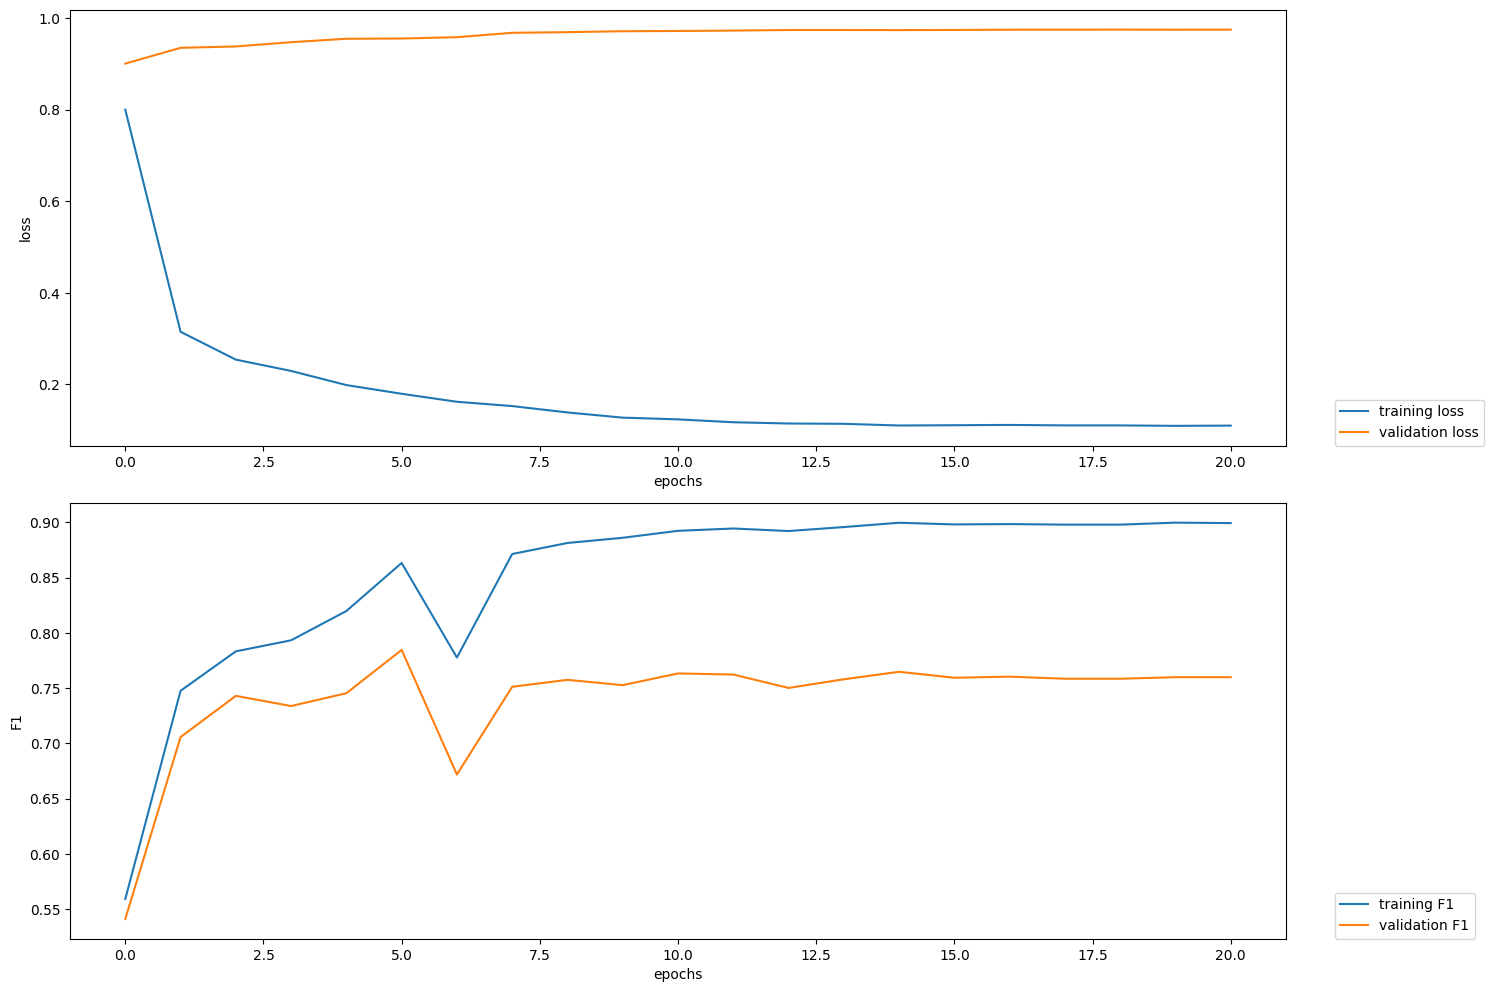

100%|██████████| 79/79 [00:22<00:00,  3.53it/s]

2023-04-21 08:09:20,971 Evaluating as a multi-label problem: True



100%|██████████| 10/10 [00:03<00:00,  3.28it/s]

2023-04-21 08:09:25,816 Evaluating as a multi-label problem: False



100%|██████████| 10/10 [00:04<00:00,  2.32it/s]

2023-04-21 08:09:30,219 Evaluating as a multi-label problem: True


,split,index,I-ADR,B-ADR,B-Drug,B-Finding,I-Finding,B-Disease,B-Symptom,I-Symptom,I-Drug,I-Disease,micro avg,macro avg,weighted avg,samples avg
0,train,precision,0.813552,0.824810,0.965493,0.410909,0.500000,0.571429,0.727273,0.0,0.977273,0.0,0.822831,0.579074,0.792416,0.135992
1,train,recall,0.887715,0.900255,0.982092,0.365696,0.031519,0.173160,0.036036,0.0,0.267081,0.0,0.819847,0.364355,0.819847,0.135955
2,train,f1-score,0.849017,0.860883,0.973722,0.386986,0.059299,0.265781,0.068670,0.0,0.419512,0.0,0.821336,0.388387,0.792143,0.135968
3,train,support,7953.000000,4712.000000,1396.000000,309.000000,349.000000,231.000000,222.000000,218.0,161.000000,169.0,15720.000000,15720.000000,15720.000000,15720.000000
4,dev,precision,0.709648,0.753406,0.967568,0.375000,1.000000,0.500000,1.000000,0.0,0.000000,0.0,0.742885,0.530562,0.712740,NaN
5,dev,recall,0.814700,0.849462,0.972826,0.187500,0.055556,0.129032,0.080000,0.0,0.000000,0.0,0.745402,0.308908,0.745402,NaN
6,dev,f1-score,0.758554,0.798556,0.970190,0.250000,0.105263,0.205128,0.148148,0.0,0.000000,0.0,0.744141,0.323584,0.708076,NaN
7,dev,support,966.000000,651.000000,184.000000,64.000000,54.000000,31.000000,25.000000,36.0,27.000000,28.0,2066.000000,2066.000000,2066.000000,NaN
8,test,precision,0.773966,0.791332,0.921739,0.392857,0.000000,0.428571,0.000000,0.0,1.000000,0.0,0.790562,0.430847,0.747659,0.125993
9,test,recall,0.793175,0.855903,0.968037,0.211538,0.000000,0.150000,0.000000,0.0,0.096154,0.0,0.749623,0.307481,0.749623,0.125908


In [36]:
print(suf)

os.mkdir('flair_ner_model'+suf+'/classification_report')
plotter.plot_training_curves('flair_ner_model'+suf+'/loss.tsv')

# evaluate the tagger on the test set
result = tagger.evaluate(corpus.train, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/train.txt', 'w').write(str(result))
res1 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res1.insert(loc=0, column='split', value='train')

result = tagger.evaluate(corpus.dev, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/dev.txt', 'w').write(str(result))
res2 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res2.insert(loc=0, column='split', value='dev')

result = tagger.evaluate(corpus.test, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/test.txt', 'w').write(str(result))
res3 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res3.insert(loc=0, column='split', value='test')

res = pd.concat([res1,res2,res3],ignore_index=True)
res.to_csv('flair_ner_model'+suf+'/classification_report.csv',index=False)
res

In [37]:
# import time
# start_time = time.time()
# while time.time() - start_time < 1:
#     time.sleep(1)
# print('Session has timed out (2 minutes). Disconnecting...')
# !kill -9 -1

Layering can be a good idea if the NER tags in the first layer have their own set of dependent values in the second layer. This can help capture more information about the entities being recognized and provide more context for downstream tasks. However, it also increases the complexity of the annotation and the training process, so it should be used judiciously. In general, it's a good idea to start with a simple tag scheme and gradually increase complexity as needed.

    does it really matter if u use the E header

It depends on the specific task and the requirements of the downstream model. In some cases, using the E tag can help disambiguate between overlapping entities, while in other cases it may not be necessary or even desired. Ultimately, it's up to the developer to determine the appropriate tagging scheme for their specific use case.

    would adding POS as an extra NER layer help model performance or not

Adding POS as an extra NER layer may or may not help model performance, depending on the specific use case and data being analyzed.

On one hand, incorporating POS tags could provide additional context to the model and help it better distinguish between named entities and other parts of speech. For example, knowing that a word is a noun or verb could help the model determine if it is likely to be a named entity or not.

On the other hand, adding an additional layer could also increase model complexity and training time without necessarily improving performance. It may also require additional manual annotation efforts to create a labeled dataset with both NER and POS tags.

Ultimately, whether to include POS as an additional layer will depend on the specific requirements and goals of the project, as well as the available data and resources.

    besides bioes ordering (which is up-to-down), it doesn't matter what order the tags in the same domain appear in left-to-right?

Yes, that is correct. As long as the BIOES order is maintained vertically, the order of tags in the same domain from left-to-right should not impact training in flai

    different typenames must be treated as separate tasks?

Yes, that's correct. Different typenames should be treated as separate tasks because they represent different types of annotations that you want to predict. For example, in a biomedical NER task, you might want to predict the entity types of both drugs and diseases, which would be represented by two different typenames in your annotation data. Predicting both types of entities would require different models and possibly different evaluation metrics.